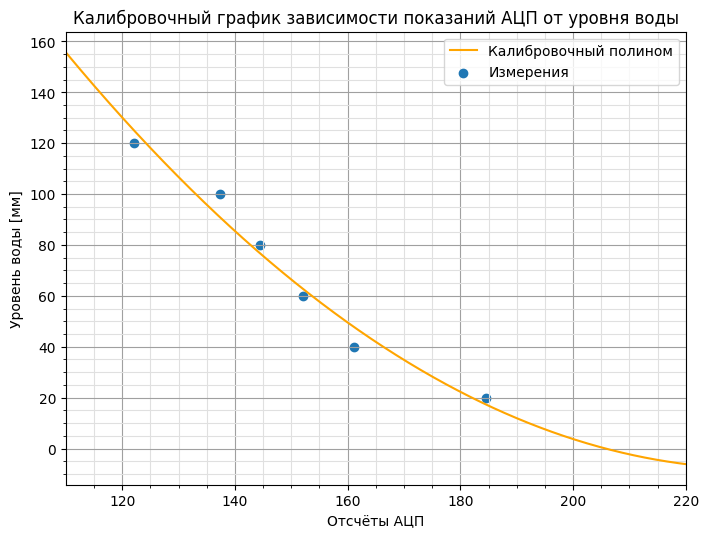

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def read(file):
  data = []
  with open(file, 'r') as file:
    for line in file.readlines():
      data.append(float(line))
  return np.array(data)

def aver(data):
  return np.sum(data) / np.size(data) 

mm_20 = read('wave-data-20mm.txt')
mm_40 = read('wave-data-40mm.txt')
mm_60 = read('wave-data-60mm.txt')
mm_80 = read('wave-data-80mm.txt') 
mm_100 = read('wave-data-100mm.txt')
mm_120 = read('wave-data-120mm.txt')

x = np.array([aver(mm_20), aver(mm_40), aver(mm_60), aver(mm_80), aver(mm_100), aver(mm_120)])
y = np.array([20, 40, 60, 80, 100, 120])

coeff = np.polyfit(x,y,2)
xn = np.linspace(110,220,1000)
yn = np.poly1d(coeff)

plt.figure(figsize=(8,6), dpi=100)
plt.xlim(110, 220)
plt.title('Калибровочный график зависимости показаний АЦП от уровня воды')
plt.ylabel("Уровень воды [мм]") 
plt.xlabel("Отсчёты АЦП")
plt.grid(which = 'major', color = '#A0A0A0')
plt.minorticks_on()
plt.grid(which = 'minor', color = '#E0E0E0') 
plt.scatter(x, y, label = 'Измерения')
plt.plot(xn, yn(xn), label = 'Калибровочный полином', color = 'orange')
plt.legend()
plt.savefig('calib_wave.png')

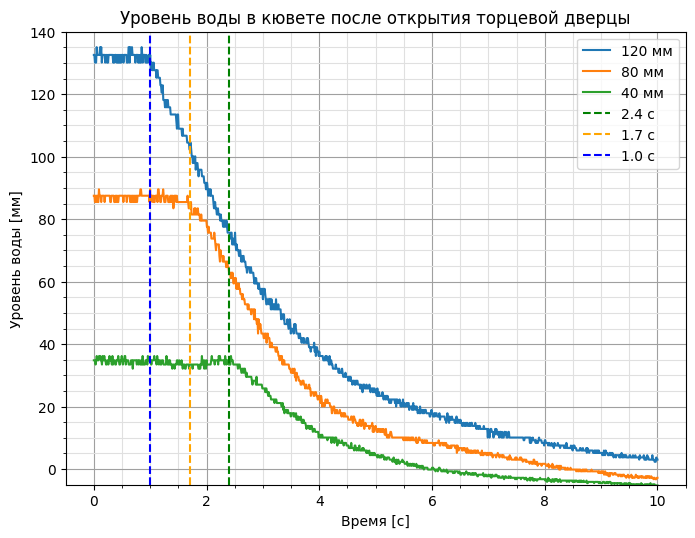

In [22]:
mm_40_test = read('wave-data-40mm-test.txt')
mm_80_test = read('wave-data-80mm-test.txt')
mm_120_test = read('wave-data-120mm-test.txt')

plt.figure(figsize=(8,6), dpi=100)
plt.title('Уровень воды в кювете после открытия торцевой дверцы')
plt.ylabel("Уровень воды [мм]") 
plt.xlabel("Время [с]")
plt.ylim(-5, 140)
plt.grid(which = 'major', color = '#A0A0A0')
plt.minorticks_on()
plt.grid(which = 'minor', color = '#E0E0E0') 
t_120 = np.linspace(0, 10, np.size(mm_120_test))
t_80 = np.linspace(0, 10, np.size(mm_80_test))
t_40 = np.linspace(0, 10, np.size(mm_40_test))
plt.plot(t_120, yn(mm_120_test), label = '120 мм')
plt.plot(t_80, yn(mm_80_test), label = '80 мм')
plt.plot(t_40, yn(mm_40_test), label = '40 мм')
plt.plot(np.array([2.4] * 200), np.linspace(-5, 140, 200), color = 'g', linestyle = '--', label = '2.4 с')
plt.plot(np.array([1.7] * 200), np.linspace(-5, 140, 200), color = 'orange', linestyle = '--', label = '1.7 с')
plt.plot(np.array([1.0] * 200), np.linspace(-5, 140, 200), color = 'b', linestyle = '--', label = '1.0 с')
plt.legend()
plt.savefig('measure_wave.png')

